In [1]:
import pandas as pd
import numpy as np
from numpy import nan
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [2]:
movies_changes5= pd.read_csv("movies_changes5.csv")

In [4]:
cols_to_str = ['Certificate_1', 'Certificate_2', 'Description',
               'Actor_1', 'Actor_2', 'Actor_3', 'Actor_4',
               'Genre_1', 'Genres_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6',
               'Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening',
               'Name', 'Type', 'Director']
movies_changes5[cols_to_str] = movies_changes5[cols_to_str].astype("string")

In [5]:
movies_changes5.dtypes

Unnamed: 0         int64
Name              string
Year               int64
Rating           float64
Votes              int64
Runtime            int64
Type              string
Episodes         float64
Nudity            string
Violence          string
Profanity         string
Alcohol           string
Frightening       string
Metascore        float64
Gross            float64
Director          string
Premiere         float64
Poster_Link       object
Genre_1           string
Genres_2          string
Genre_3           string
Genre_4           string
Genre_5           string
Genre_6           string
Actor_1           string
Actor_2           string
Actor_3           string
Actor_4           string
Certificate_1     string
Certificate_2     string
Description       string
Language1         object
Language2        float64
dtype: object

In [6]:
movies_changes5.Genre_3.unique()

<StringArray>
[  ' Thriller',     ' Horror',          <NA>,      ' Drama',    ' Mystery',
      ' Crime',    ' Fantasy',     ' Sci-Fi',        ' War',     ' Family',
     ' Comedy',      ' Music',  ' Film-Noir',    ' History',    ' Romance',
  ' Animation',      ' Sport',    ' Western',    ' Musical',  ' Biography',
 ' Reality-TV',      ' Short']
Length: 22, dtype: string

### Testing mutliple Genre types in word cloud

In [28]:
genres_columns.dtypes

Genre_1        string
Genres_2       string
Genre_3        string
Genre_4        string
Genre_5        string
Genre_6        string
genres_join    object
dtype: object

In [34]:
## gather all the genres columns
genres_columns= pd.concat([movies_changes5.Genre_1,movies_changes5.Genres_2, 
                           movies_changes5.Genre_3,movies_changes5.Genre_4, 
                           movies_changes5.Genre_5, movies_changes5.Genre_6], axis=1)
###filling the <NA>
genres_columns.fillna('empty', inplace=True)

###join all columns in one
genres_columns["genres_join"] = (
    genres_columns[['Genre_1', 'Genres_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6']]
        .apply(lambda x: x.str.split(',\s*'))
        .sum(axis=1).map(np.array)
        .apply(lambda x: ', '.join(np.unique(x[x != 'empty'])))        
        .replace('', 'empty')
    ) 
###to string
genres_columns['genres_join'] = genres_columns['genres_join'].astype("string")

###concat to the movies_changes5 as cloud_test
cloud_test= pd.concat([movies_changes5,genres_columns.genres_join, ], axis=1)


In [36]:
genres_columns.genres_join.unique()

<StringArray>
[      ' Adventure,  Thriller, Action',           ' Fantasy,  Horror, Comedy',
                     ' Horror, Comedy',                   ' Thriller, Horror',
              ' Crime,  Drama, Comedy',                     ' Romance, Drama',
            ' Drama,  Thriller, Crime',            ' Drama,  Mystery, Action',
                     ' Sci-Fi, Action',  ' Comedy,  Crime,  Drama, Biography',
 ...
             ' Music,  Musical, Drama',             ' Romance,  Sport, Drama',
         ' Drama,  Fantasy, Animation',             ' Sci-Fi,  Short, Action',
            ' Family,  History, Drama', ' Crime,  Drama,  Fantasy, Animation',
             ' Drama,  War, Animation',           ' Fantasy,  History, Drama',
         ' Crime,  Mystery, Animation',          ' Animation,  Crime, Action']
Length: 418, dtype: string

In [43]:
###cheking the first row
check2 = cloud_test[cloud_test["genres_join"] == ' Thriller, Horror']
len(check2)

81

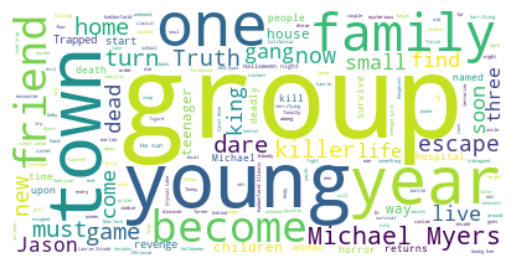

In [44]:
###removing na
#check = check.dropna(subset=['Description'])
###all decriptions
combo2 = " ".join(description for description in check2.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(combo2)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
###cheking the first row
check1 = cloud_test[cloud_test["genres_join"] == ' Fantasy,  Horror, Comedy']
len(check1)

24

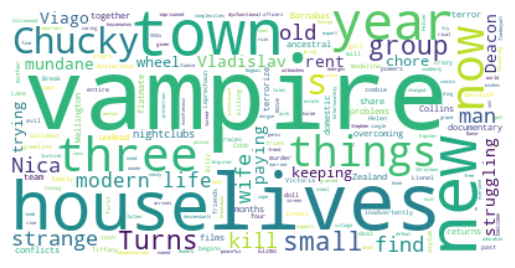

In [39]:
###removing na
#check = check.dropna(subset=['Description'])
###all decriptions
combo1 = " ".join(description for description in check1.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(combo1)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
###cheking the first row
check = cloud_test[cloud_test["genres_join"] == ' Adventure,  Thriller, Action']
len(check)

72

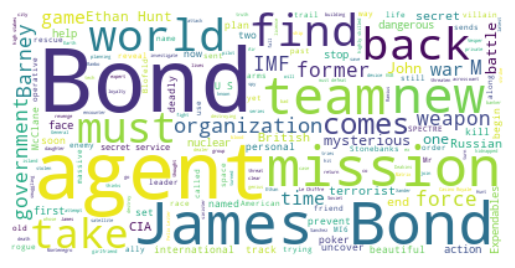

In [41]:
###removing na
#check = check.dropna(subset=['Description'])
###all decriptions
combo = " ".join(description for description in check.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(combo)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

### Testing Single Genre types in word cloud

#### Select Romance movies from the dataset (Romance_movies)

In [32]:
Romance_movies = movies_changes5[(movies_changes5["Genre_1"] == 'Romance')|
                               (movies_changes5["Genre_3"] == ' Romance')|
                               (movies_changes5["Genres_2"] == ' Romance')|
                               (movies_changes5["Genre_4"] == ' Romance')|
                               (movies_changes5["Genre_5"] == ' Romance')|
                               (movies_changes5["Genre_6"] == ' Romance')]
len(Romance_movies)
print(Romance_movies)

      Unnamed: 0                               Name  Year  Rating    Votes  \
6              9                            Titanic  1997     7.8  1096676   
47            51                       Little Women  2019     7.8   167482   
48            54                       Forrest Gump  1994     8.8  1912582   
79            87                Edward Scissorhands  1990     7.9   462968   
83            92               Call Me by Your Name  2017     7.9   238038   
...          ...                                ...   ...     ...      ...   
4220        5480  Portrait de la jeune fille en feu  2019     8.1    78115   
4223        5533                   Fa yeung nin wah  2000     8.1   137467   
4240        5678              Nuovo Cinema Paradiso  1988     8.5   246276   
4254        5730                         Annie Hall  1977     8.0   258522   
4271        5794                      Belle de jour  1967     7.7    42495   

      Runtime  Type  Episodes    Nudity  Violence  ... Genre_6 

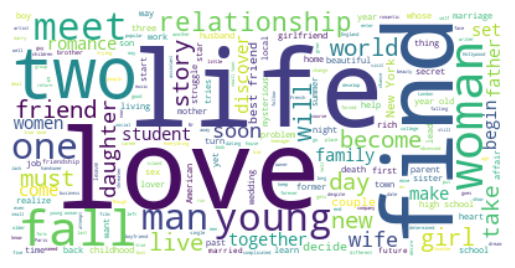

In [19]:
Romance_movies = Romance_movies.dropna(subset=['Description'])
###all decriptions
Romance = " ".join(description for description in Romance_movies.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(Romance)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Select Animation movies from the dataset (Animation_movies)

In [7]:
Animation_movies = movies_changes5[(movies_changes5["Genre_1"] == 'Animation')|
                               (movies_changes5["Genre_3"] == ' Animation')|
                               (movies_changes5["Genres_2"] == ' Animation')|
                               (movies_changes5["Genre_4"] == ' Animation')|
                               (movies_changes5["Genre_5"] == ' Animation')|
                               (movies_changes5["Genre_6"] == ' Animation')]
len(Animation_movies)


219

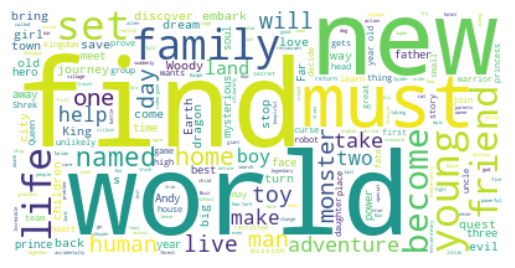

In [8]:
Animation_movies = Animation_movies.dropna(subset=['Description'])
###all decriptions
Animation = " ".join(description for description in Animation_movies.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(Animation)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Select Film_Noir movies from the dataset (Film_Noir_movies)

In [10]:
Film_Noir_movies = movies_changes5[(movies_changes5["Genre_1"] == 'Film-Noir')|
                               (movies_changes5["Genre_3"] == ' Film-Noir')|
                               (movies_changes5["Genres_2"] == ' Film-Noir')|
                               (movies_changes5["Genre_4"] == ' Film-Noir')|
                               (movies_changes5["Genre_5"] == ' Film-Noir')|
                               (movies_changes5["Genre_6"] == ' Film-Noir')]
len(Film_Noir_movies)

11

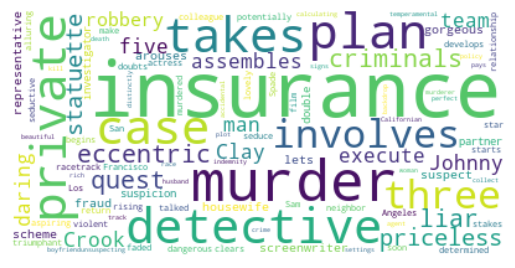

In [11]:
Film_Noir_movies = Film_Noir_movies.dropna(subset=['Description'])
###all decriptions
Film_Noir = " ".join(description for description in Film_Noir_movies.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(Film_Noir)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Select Sport movies from the dataset (Sport_movies)

In [12]:
Sport_movies = movies_changes5[(movies_changes5["Genre_1"] == 'Sport')|
                               (movies_changes5["Genre_3"] == ' Sport')|
                               (movies_changes5["Genres_2"] == ' Sport')|
                               (movies_changes5["Genre_4"] == ' Sport')|
                               (movies_changes5["Genre_5"] == ' Sport')|
                               (movies_changes5["Genre_6"] == ' Sport')]
len(Sport_movies)

71

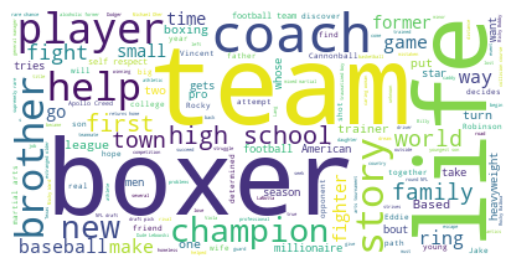

In [13]:
Sport_movies = Sport_movies.dropna(subset=['Description'])
###all decriptions
Sport = " ".join(description for description in Sport_movies.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(Sport)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Select History movies from the dataset (History_movies)

In [14]:
History_movies = movies_changes5[(movies_changes5["Genre_1"] == 'History')|
                               (movies_changes5["Genre_3"] == ' History')|
                               (movies_changes5["Genres_2"] == ' History')|
                               (movies_changes5["Genre_4"] == ' History')|
                               (movies_changes5["Genre_5"] == ' History')|
                               (movies_changes5["Genre_6"] == ' History')]
len(History_movies)

161

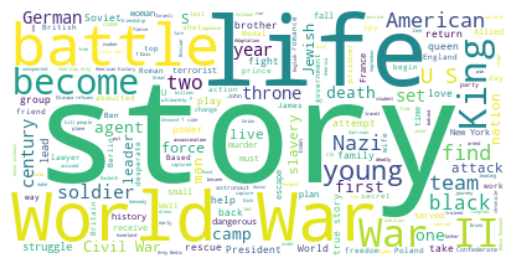

In [15]:
History_movies = History_movies.dropna(subset=['Description'])
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["find", "life", "two", "one", "become", "young", "live", "story",
#                  "young", "become", "live", "take", "set","family",])
#stopwords=stopwords,
###all decriptions
History = " ".join(description for description in History_movies.Description)
# Generate a word cloud image
wordcloud4 = WordCloud( background_color="white").generate(History)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

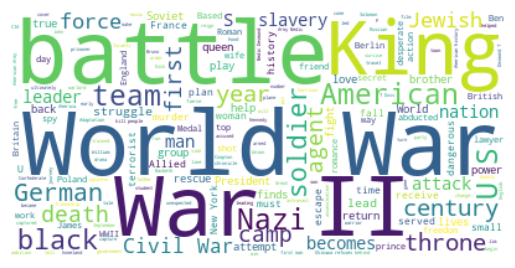

In [14]:
History_movies = History_movies.dropna(subset=['Description'])
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["find", "life", "two", "one", "become", "young", "live", "story",
                  "young", "become", "live", "take", "set","family",])
###all decriptions
History = " ".join(description for description in History_movies.Description)
# Generate a word cloud image
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white").generate(History)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Select comedy movies from the dataset (comedy_movies)

In [15]:
comedy_movies = movies_changes5[(movies_changes5["Genre_1"] == 'Comedy')|
                               (movies_changes5["Genre_3"] == ' Comedy')|
                               (movies_changes5["Genres_2"] == ' Comedy')|
                               (movies_changes5["Genre_4"] == ' Comedy')|
                               (movies_changes5["Genre_5"] == ' Comedy')|
                               (movies_changes5["Genre_6"] == ' Comedy')]
len(comedy_movies)

1216

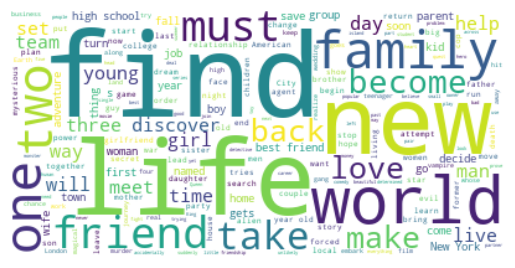

In [16]:
comedy_movies = comedy_movies.dropna(subset=['Description'])
###all decriptions
comedy = " ".join(description for description in comedy_movies.Description)
# Generate a word cloud image
wordcloud3 = WordCloud( background_color="white").generate(comedy)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Select drama movies from the dataset (drama_movies)

In [17]:
drama_movies = movies_changes5[(movies_changes5["Genre_1"] == 'Drama')|
                               (movies_changes5["Genre_3"] == ' Drama')|
                               (movies_changes5["Genres_2"] == ' Drama')|
                               (movies_changes5["Genre_4"] == ' Drama')|
                               (movies_changes5["Genre_5"] == ' Drama')|
                               (movies_changes5["Genre_6"] == ' Drama')]
len(drama_movies)

2200

In [18]:
drama_movies = drama_movies.dropna(subset=['Description'])

In [19]:
drama_movies.Description.isnull().values.any()

False

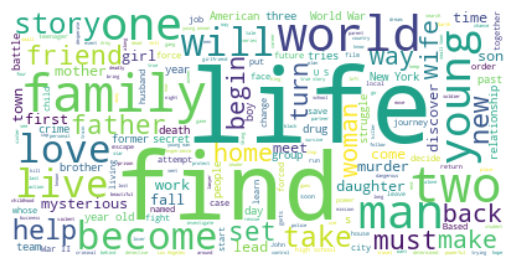

In [20]:
###all decriptions
drama = " ".join(description for description in drama_movies.Description)
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(drama)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

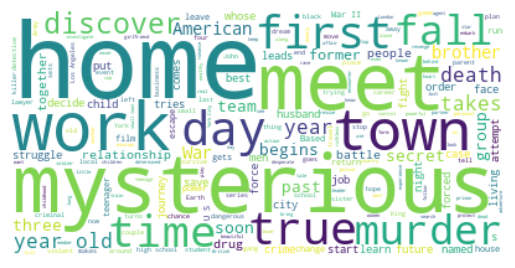

In [21]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["find", "life", "two", "one", "become", "young", "must", "woman",
                  "will", "man", "world", "live", "make", "set","finds",
                  "family","help", "lives", "take","story", "father", 
                  "son", "boy", "gilr","love", "come", "friend",
                  "new", "begin", "wife","turn", "way", "girl", 
                   "friends", "back", "daughter","mother", "becomes", "lead"])
###all decriptions
drama = " ".join(description for description in drama_movies.Description)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(drama)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
wordcloud.to_file("img.png")

#### Select action movies from the dataset (action_movies1)

In [23]:
action_movies = movies_changes5[(movies_changes5["Genre_1"] == 'Action')|
                               (movies_changes5["Genre_3"] == ' Action')|
                               (movies_changes5["Genres_2"] == ' Action')|
                               (movies_changes5["Genre_4"] == ' Action')|
                               (movies_changes5["Genre_5"] == ' Action')|
                               (movies_changes5["Genre_6"] == ' Action')]
len(action_movies)

1377

In [24]:
print(action_movies1)

NameError: name 'action_movies1' is not defined

In [ ]:
action_movies = action_movies.dropna(subset=['Description'])

In [ ]:
action_movies.Description.isnull().values.any()

##### word count test on action movies 

In [ ]:
word_action_count = action_movies.Description.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
word_action_count.head(60)

##### Word cloud try on action movies

In [ ]:
?WordCloud

In [ ]:
# Start with one review:
action = action_movies1.Description[0]

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(action)

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(action)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
action_movies.Description.isna().sum()

In [ ]:
###all decriptions
action = " ".join(description for description in action_movies.Description)
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(action)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("img.png")